In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow as show

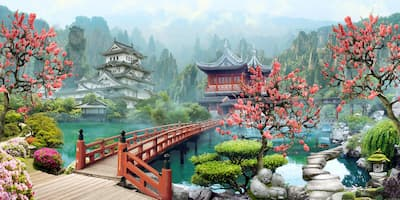

In [ ]:
img = cv2.imread('image.jpg')
show(img)

In [ ]:
size = np.array([img.shape[1], img.shape[0]])
size = (size * 0.5).astype(int)
resized_img = cv2.resize(img, tuple(size))

size = np.array([resized_img.shape[1], resized_img.shape[0]])
size = (size * 0.5).astype(int)
resized_img = cv2.resize(resized_img, tuple(size))

size = np.array([resized_img.shape[1], resized_img.shape[0]])
size = (size * 0.5).astype(int)
resized_img = cv2.resize(resized_img, tuple(size))


pyr_img = cv2.pyrDown(img)
pyr_img = cv2.pyrDown(pyr_img)
pyr_img = cv2.pyrDown(pyr_img)

print('Original:', img.shape)
print('resize:', resized_img.shape)
print('pyrDown:', pyr_img.shape[:2])

print('\nresize:')
show(resized_img)
print('\npyrDown:')
show(pyr_img)

Original: (200, 400, 3)
resize: (25, 50, 3)
pyrDown: (25, 50)

resize:



pyrDown:


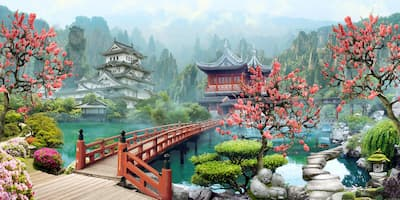

BINARY


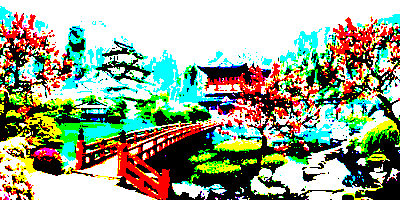

BINARY_INV


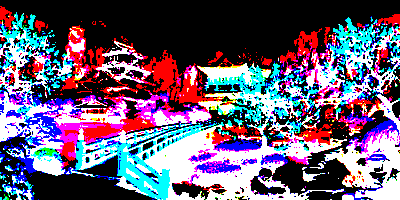

TRUNC


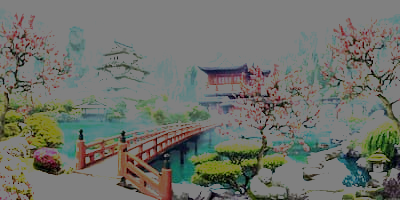

TOZERO


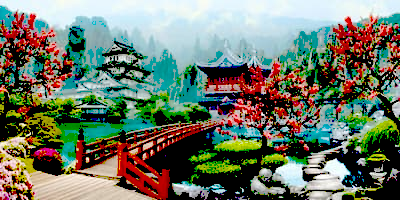

TOZERO_INV


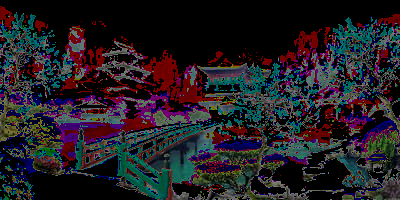

In [ ]:
ret, thresh1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO_INV)

show(img)

print("BINARY")
show(thresh1)

print("BINARY_INV")
show(thresh2)

print("TRUNC")
show(thresh3)

print("TOZERO")
show(thresh4)

print("TOZERO_INV")
show(thresh5)

BINARY


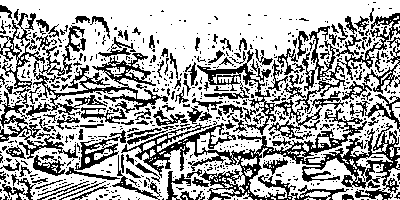

BINARY_INV


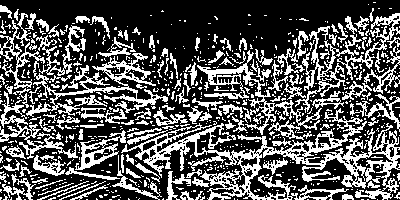

In [ ]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh_img_bin = cv2.adaptiveThreshold(
    src=img_grey, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY, 
    blockSize=15, 
    C=5)

thresh_img_bin_inv = cv2.adaptiveThreshold(
    src=img_grey, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=15, 
    C=5)

print('BINARY')
show(thresh_img_bin)

print('BINARY_INV')
show(thresh_img_bin_inv)

BINARY, C = 0


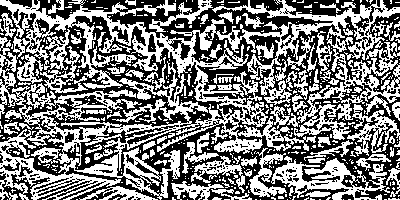

BINARY_INV, C = 0


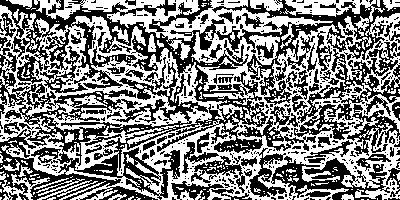

BINARY, C = -5


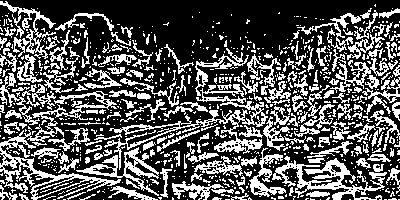

BINARY_INV, C = -5


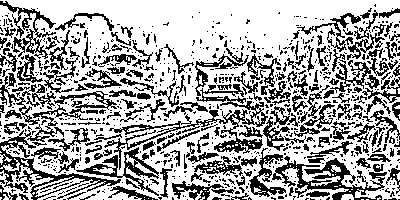

In [ ]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for curr_c in (0, -5):
    thresh_img_bin = cv2.adaptiveThreshold(
        src=img_grey, 
        maxValue=255, 
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        thresholdType=cv2.THRESH_BINARY, 
        blockSize=15, 
        C=curr_c)

    thresh_img_bin_inv = cv2.adaptiveThreshold(
        src=img_grey, 
        maxValue=255, 
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        thresholdType=cv2.THRESH_BINARY_INV, 
        blockSize=15, 
        C=curr_c)

    print('BINARY, C =', curr_c)
    show(thresh_img_bin)

    print('BINARY_INV, C =', curr_c)
    show(thresh_img_bin_inv)

Original


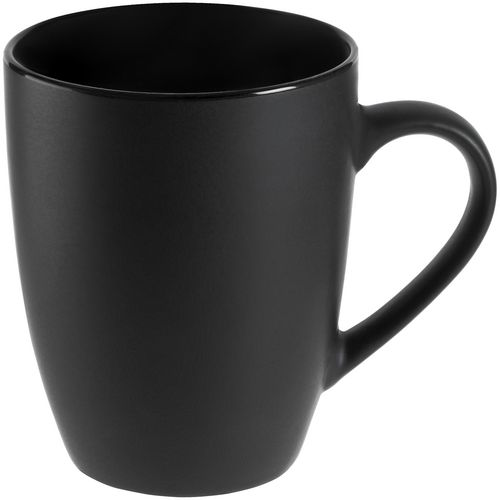

Thresholded


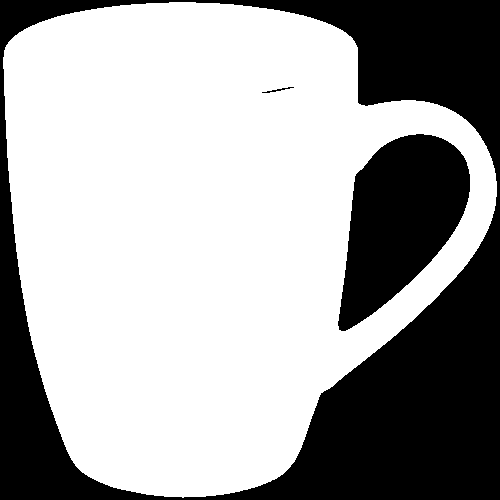

Contour


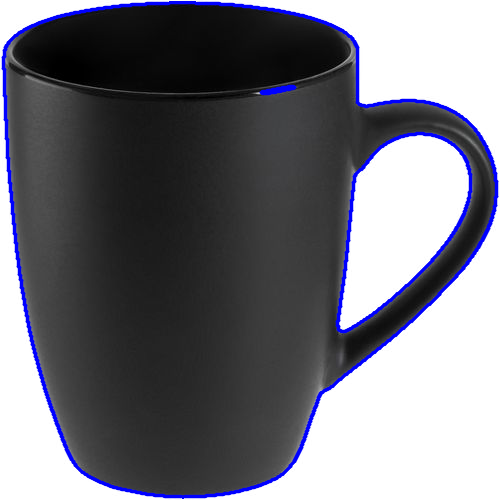

pyrMeanShiftFiltering


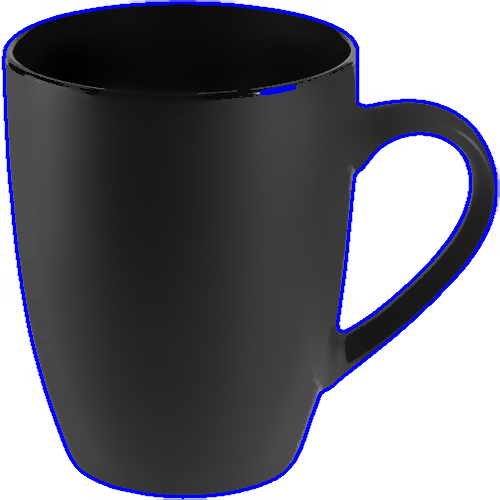

In [ ]:
img_1 = cv2.imread('cup.jpg')
gray_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(gray_img_1, 200, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contoured_img = cv2.drawContours(img_1.copy(), contours, -1, (255, 0, 0), 2, cv2.LINE_AA, hierarchy, 1)
pyr_MSF = cv2.pyrMeanShiftFiltering(contoured_img, 15, 35)

print('Original')
show(img_1)

print('Thresholded')
show(thresh_img)

print('Contour')
show(contoured_img)

print('pyrMeanShiftFiltering')
show(pyr_MSF)

Original:


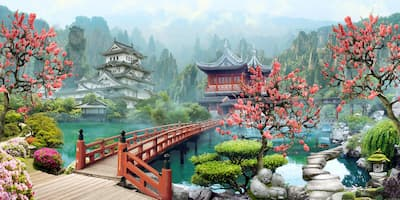

Angle 60


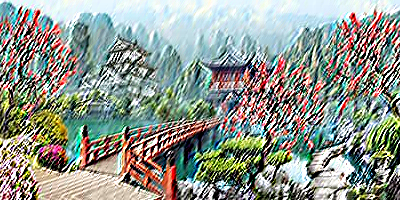

In [ ]:
kernel = np.array([
    [0, -1, 1, 1, -1],
    [0, -1, 2, -1, 0],
    [-1, 2, -1, 0, 0],
    [1, 2, -1, -1, 0],
    [2, -2, 0, 0, 0]             
    ])

img1 = cv2.filter2D(img, -1, kernel, anchor=(4, 0))

print('Original:')
show(img)

print('Angle 60')
show(img1)

Original:


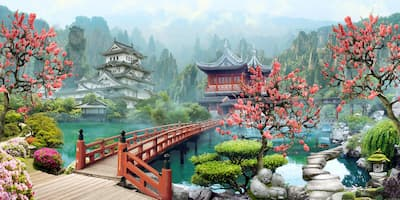

First kernel:


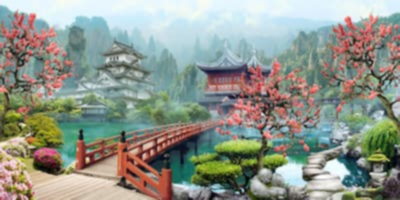

Double kernel


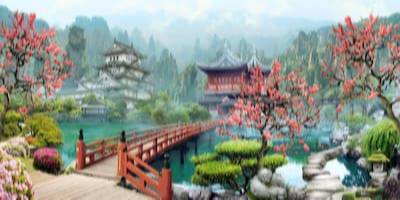

In [ ]:
kernel_1 = np.array([
                   (1/16, 2/16, 1/16),
                   (2/16, 4/16, 2/16),
                   (1/16, 2/16, 1/16)
                   ])

kernel_2 = np.array((1/4, 2/4, 1/4)) 
kernel_3 = np.array([(1/4, 2/4, 1/4)]).T


img_first_kernel = cv2.filter2D(img, -1, kernel_1)

img_kernel_2 = cv2.filter2D(img, -1, kernel_2)
img_kernel_3 = cv2.filter2D(img_kernel_2, -1, kernel_3)


print('Original:')
show(img)

print('First kernel:')
show(img_first_kernel)

print('Double kernel')
show(img_kernel_3)

Original:


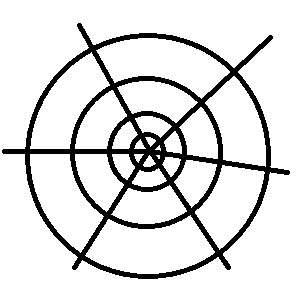



First derivative


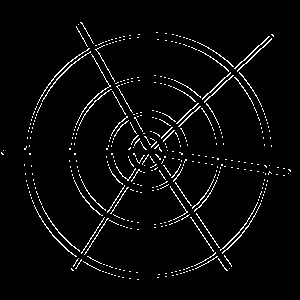

Second derivative


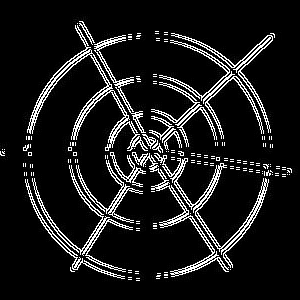



First derivative


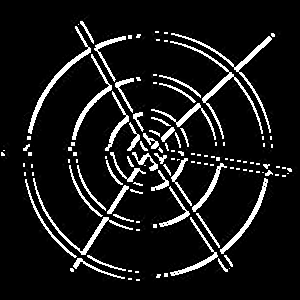

Second derivative


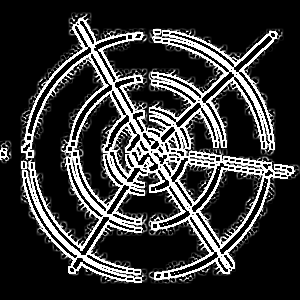



First derivative


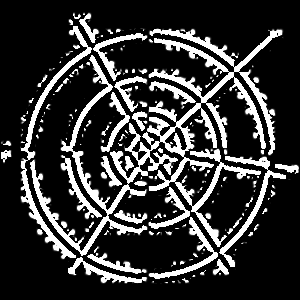

Second derivative


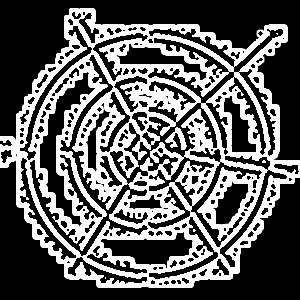



First derivative


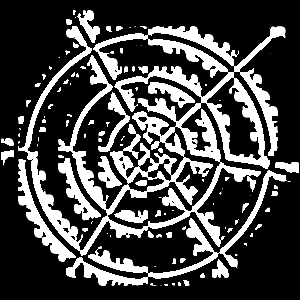

Second derivative


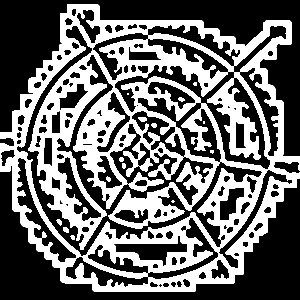

In [ ]:
target_img = cv2.imread('target.jpg')

print('Original:')
show(target_img)


for my_ksize in (3, 5, 9, 13):
    first_der = cv2.Sobel(target_img, -1, 1, 1, ksize=my_ksize)
    second_der = cv2.Laplacian(first_der, -1, ksize=my_ksize)
    print('\n\nFirst derivative')
    show(first_der)
    print('Second derivative')
    show(second_der)